<a href="https://colab.research.google.com/github/anantaramesh/Youtube-Trends/blob/master/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from textblob import TextBlob
import matplotlib.pyplot as plt
from textblob.sentiments import NaiveBayesAnalyzer
import nltk

In [ ]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/anantaramesh/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [ ]:
with open('dataframe_after_feat_eng.pkl', 'rb') as file:
    df = pickle.load(file)

In [ ]:
df.head()

,video_id,trending_date,publish_time,channel_title,category_id,category_name,title,description,tags,views,...,days_since_last_trend,views_log,likes_log,comments_log,dislikes_log,like_rate,dislike_rate,comment_rate,# of trend days,num_tags
0,2kyS6SvSYSE,2017-11-14,2017-11-13 17:13:01,CaseyNeistat,22,People & Blogs,want talk marriage,shantell channel video k lens drone gear camer...,SHANtell martin,748374,...,0 days,13.525658,10.960027,9.677528,7.995307,0.076869,0.003963,0.021318,7,1
1,1ZAPwfrtAFY,2017-11-14,2017-11-13 07:30:00,LastWeekTonight,24,Entertainment,trump presidency last week tonight john oliver...,one year presidential election john oliver dis...,"last week tonight trump presidency|""last week ...",2418783,...,0 days,14.698775,11.484382,9.449672,8.723719,0.040179,0.002541,0.005252,7,4
2,5qpjK5DgCt4,2017-11-14,2017-11-12 19:05:24,Rudy Mancuso,23,Comedy,racist superman rudy mancuso king bach lele pons,watch previous video subscribe watching like s...,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,...,0 days,14.975981,11.891595,9.009692,8.582981,0.045758,0.001673,0.002563,7,23
3,puqaWrEC7tY,2017-11-14,2017-11-13 11:00:04,Good Mythical Morning,24,Entertainment,nickelback lyrics real fake,today find link nickelback amateur secret nick...,"rhett and link|""gmm""|""good mythical morning""|""...",343168,...,0 days,12.745975,9.227492,7.671827,6.502790,0.029641,0.001941,0.006253,7,27
4,d380meD0W0M,2017-11-14,2017-11-12 18:01:41,nigahiga,24,Entertainment,dare going bald,know since show back might best episode yet le...,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,...,0 days,14.555413,11.792343,9.771041,7.595890,0.063097,0.000949,0.008359,6,14


In [ ]:
df.columns

Index(['video_id', 'trending_date', 'publish_time', 'channel_title',
       'category_id', 'category_name', 'title', 'description', 'tags', 'views',
       'likes', 'dislikes', 'comment_count', 'days_since_last_trend',
       'views_log', 'likes_log', 'comments_log', 'dislikes_log', 'like_rate',
       'dislike_rate', 'comment_rate', '# of trend days', 'num_tags'],
      dtype='object')

To perform sentiment analysis on the textual columns of my dataset, I am going to use textblob. Textblob is a python library that is commonly used for processing textual data. It has several features including part-of-speech tagging, sentiment analysis, and finding n-grams.

Here, I am making use of it to extract the sentiment of the video descriptions.

In [ ]:
bloblist_desc = list()

df_desc = df['description'].astype(str)
for row in df_desc:
    blob = TextBlob(row)
    bloblist_desc.append((row, blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_pol_desc_default = pd.DataFrame(bloblist_desc, columns = ['description','desc_sent','desc_subj'])

In [ ]:
df_pol_desc_default

,description,desc_sent,desc_pol
0,shantell channel video k lens drone gear camer...,0.075000,0.558333
1,one year presidential election john oliver dis...,0.025000,0.300000
2,watch previous video subscribe watching like s...,-0.166667,0.166667
3,today find link nickelback amateur secret nick...,0.031061,0.350758
4,know since show back might best episode yet le...,0.459091,0.338636
...,...,...,...
6346,hey larlees todays video testing crayola makeu...,0.450758,0.578220
6347,first take stephen smith max kellerman react k...,0.258333,0.408333
6348,james corden ashton kutcher square rap battle ...,-0.012758,0.526182
6349,ground chuck great purpose buy anywhere choice...,0.310000,0.620000


In [ ]:
def func(df):
    if df['desc_sent'] > 0:
        val = "Positive"
    elif df['desc_sent'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_pol_desc_default['desc_sent_type'] = df_pol_desc_default.apply(func, axis=1)

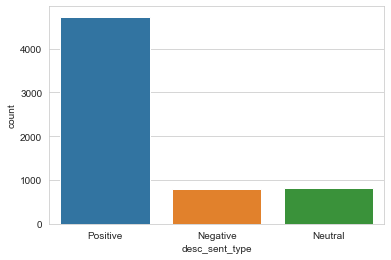

In [ ]:
#plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="desc_sent_type", data=df_pol_desc_default)

Let us examine what kinds of videos result in a negative sentiment rating.

In [ ]:
df_pol_desc_default[df_pol_desc_default['desc_sent_type'] == 'Negative']

,description,desc_sent,desc_pol,desc_sent_type
2,watch previous video subscribe watching like s...,-0.166667,0.166667,Negative
7,ice cream pint combination lock ice cream sand...,-0.283333,0.433333,Negative
11,shiva arrives time king ezekiel attempts take ...,-0.200000,0.400000,Negative
17,check patreon page full lesson claws belly tug...,-0.012963,0.610317,Negative
24,hard figure people showers please subscribe ea...,-0.150589,0.473653,Negative
...,...,...,...,...
6298,little birds visit sign updates,-0.187500,0.500000,Negative
6301,go behind scenes music video shoot live offici...,-0.087879,0.483333,Negative
6317,watch e trailer cyberpunk role playing game da...,-0.006250,0.345833,Negative
6341,witness darkest chapter conjuring universe the...,-0.147197,0.442955,Negative


Hmmm, several of these don't really look all that negative. Let us examine the first sentence.

In [ ]:
df_pol_desc_default.iloc[2]['description']

'watch previous video subscribe watching like subscribe videos find instagram rudy mancuso pons bach effects caleb natale gregoryshots studios channels alesso jibawi puppets stocking sarkis pons tyson rudy mancuso studios'

Let us examine what the most negative description in our dataset is.

In [ ]:
df_pol_desc_default[df_pol_desc_default['desc_sent'] == df_pol_desc_default['desc_sent'].min()]

,description,desc_sent,desc_pol,desc_sent_type
2368,carlisle said disgusted nba business partner,-1.0,1.0,Negative
4072,terrible inventors unite would think build shi...,-1.0,1.0,Negative


Ok, these do indeed seem very negative. 

I want to see if I can perform a more in-depth analysis of my text. Upon researching how TextBlob works, I see that we are given the choice of algorithm we want to use to conduct the analysis. The default analyzer is PatternAnalyzer, which is a classifier built on the pattern library. There is another algorithm we can use - the NaiveBayesAnalyzer. This analyzer is an NLTK model that is trained on a movie reviews corpus.

(I downloaded the movie reviews corpus earlier in this notebook anticipating that I will need it at a later point, but if you don't have it installed then you should do that before running the next couple of cells).

Running the NaiveBayesAnalyzer takes a lot more time than running the PatternAnalyzer, and so I am going to deal with this by dividing my dataset into batches and then running it one batch at a time.

In [ ]:
len(df_desc)

6351

In [ ]:
int(len(df_desc)/10)

635

So, if i want to divide my dataset into 10 batches, the first 9 should contain 635 rows and the 10th batch should contain 636 rows.

In [ ]:
sents_desc = list()
i=0

for batch in range(9):
    for row in df_desc[i:i+635]:
        blob = TextBlob(row, analyzer=NaiveBayesAnalyzer())
        sents_desc.append((row, blob.sentiment.p_pos, blob.sentiment.p_neg, blob.sentiment.classification))
        df_pol_desc_nb = pd.DataFrame(sents_desc, columns = ['description','percent_pos','percent_neg', 'sentiment_type'])
    i += 635
    print('Batch {} done'.format(batch))

for row in df_desc[5715:]:
    blob = TextBlob(row, analyzer=NaiveBayesAnalyzer())
    sents_desc.append((row, blob.sentiment.p_pos, blob.sentiment.p_neg, blob.sentiment.classification))
    df_pol_desc_nb = pd.DataFrame(sents_desc, columns = ['description','percent_pos','percent_neg', 'sentiment_type'])

Batch 0 done
Batch 1 done
Batch 2 done
Batch 3 done
Batch 4 done
Batch 5 done
Batch 6 done
Batch 7 done
Batch 8 done


In [ ]:
file = open('df_after_naive_bayes.pkl', 'wb')
pickle.dump(df_pol_desc_nb, file)
file.close()

In [ ]:
df_pol_desc_nb

,description,percent_pos,percent_neg,sentiment_type
0,shantell channel video k lens drone gear camer...,0.962969,3.703134e-02,pos
1,one year presidential election john oliver dis...,0.995525,4.475249e-03,pos
2,watch previous video subscribe watching like s...,0.757446,2.425543e-01,pos
3,today find link nickelback amateur secret nick...,0.832617,1.673830e-01,pos
4,know since show back might best episode yet le...,0.326614,6.733864e-01,neg
...,...,...,...,...
6346,hey larlees todays video testing crayola makeu...,0.119633,8.803673e-01,neg
6347,first take stephen smith max kellerman react k...,0.944167,5.583341e-02,pos
6348,james corden ashton kutcher square rap battle ...,0.336782,6.632183e-01,neg
6349,ground chuck great purpose buy anywhere choice...,0.999598,4.016290e-04,pos


<AxesSubplot:xlabel='sentiment_type', ylabel='count'>

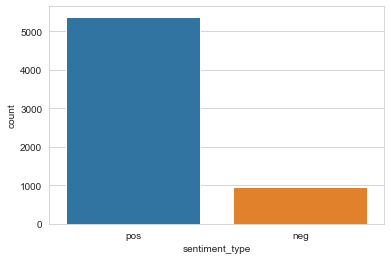

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="sentiment_type", data=df_pol_desc_nb)

Let us compare the sentiments we calculated using the default PatternAnalyzer and the NaiveBayesAnalyzer and see where the differences lie.

In [ ]:
len(df_pol_desc_nb)

6351

In [ ]:
sum(df_pol_desc_default['description'] == df_pol_desc_nb['description'])

6351

In [ ]:
df_combined_sent = df_pol_desc_default.merge(df_pol_desc_nb, left_on = 'description', right_on='description')

In [ ]:
df_combined_sent

,description,desc_sent,desc_pol,desc_sent_type,percent_pos,percent_neg,sentiment_type
0,shantell channel video k lens drone gear camer...,0.075000,0.558333,Positive,0.962969,3.703134e-02,pos
1,one year presidential election john oliver dis...,0.025000,0.300000,Positive,0.995525,4.475249e-03,pos
2,watch previous video subscribe watching like s...,-0.166667,0.166667,Negative,0.757446,2.425543e-01,pos
3,today find link nickelback amateur secret nick...,0.031061,0.350758,Positive,0.832617,1.673830e-01,pos
4,know since show back might best episode yet le...,0.459091,0.338636,Positive,0.326614,6.733864e-01,neg
...,...,...,...,...,...,...,...
17574,hey larlees todays video testing crayola makeu...,0.450758,0.578220,Positive,0.119633,8.803673e-01,neg
17575,first take stephen smith max kellerman react k...,0.258333,0.408333,Positive,0.944167,5.583341e-02,pos
17576,james corden ashton kutcher square rap battle ...,-0.012758,0.526182,Negative,0.336782,6.632183e-01,neg
17577,ground chuck great purpose buy anywhere choice...,0.310000,0.620000,Positive,0.999598,4.016290e-04,pos


In [ ]:
print("There are {} video descriptions that PatternAnalyzer has labeled as negative, and there are {} video descriptions that NaiveBayesAnalyzer has labeled as negative.".format(sum(df_combined_sent['desc_sent_type'] == 'Negative'), sum(df_combined_sent['sentiment_type'] == 'neg')))

There are 818 video descriptions that PatternAnalyzer has labeled as negative, and there are 1039 video descriptions that NaiveBayesAnalyzer has labeled as negative.


Let us look at the ones that PatternAnalyzer called positive and the NaiveBayesAnalyzer labeled as negative. Maybe the difference between percent_pos and percent_neg is very small?

In [ ]:
df_combined_sent[(df_combined_sent['desc_sent_type'] != 'Negative') & (df_combined_sent['sentiment_type'] == 'neg')]

,description,desc_sent,desc_pol,desc_sent_type,percent_pos,percent_neg,sentiment_type
4,know since show back might best episode yet le...,0.459091,0.338636,Positive,0.326614,0.673386,neg
15,information stay tuned,0.000000,0.000000,Neutral,0.413743,0.586257,neg
21,year designercon meet ironhead studio costume ...,0.700000,0.750000,Positive,0.001372,0.998628,neg
28,lebron james gave another time press conferenc...,0.136364,0.454545,Positive,0.473098,0.526902,neg
29,opening freaks geeks episode band,0.000000,0.000000,Neutral,0.454032,0.545968,neg
...,...,...,...,...,...,...,...
17550,shaquille neal explained ellen brief stint imp...,0.000000,0.333333,Neutral,0.398529,0.601471,neg
17551,get first look fallout prequel four times size...,0.250000,0.333333,Positive,0.471976,0.528024,neg
17554,front hillary ben kronengold benkgold shaw reb...,0.000000,0.000000,Neutral,0.360577,0.639423,neg
17558,every fighter super smash bros series entire h...,0.146296,0.484259,Positive,0.388711,0.611289,neg


Let us examine the ones where percent_neg >> percent_pos but PatternAnalyzer still labeled them as positive/neutral.

In [ ]:
len(df_combined_sent['sentiment_type'] == 'neg')

17579

In [ ]:
df_combined_sent[(df_combined_sent['desc_sent_type'] != 'Negative') & (df_combined_sent['sentiment_type'] == 'neg') & (df_combined_sent['percent_neg'] >= 0.8)]

,description,desc_sent,desc_pol,desc_sent_type,percent_pos,percent_neg,sentiment_type
21,year designercon meet ironhead studio costume ...,0.700000,0.750000,Positive,0.001372,0.998628,neg
10455,jennifer lopez ft wisin amor amor amor officia...,0.200000,0.200000,Positive,0.181276,0.818724,neg
10460,occurred november ha noi vietnamwhen walking d...,0.450000,0.262500,Positive,0.007353,0.992647,neg
10485,seattle seahawks richard sherman criticizes nf...,0.000000,0.000000,Neutral,0.128290,0.871710,neg
10490,follow us behind scenes making video falls for...,0.088095,0.402381,Positive,0.035342,0.964658,neg
...,...,...,...,...,...,...,...
17487,go say congrats girl natty reeves,0.000000,0.000000,Neutral,0.134797,0.865203,neg
17502,stephen smith gushes kevin durant performance ...,0.147222,0.516667,Positive,0.105768,0.894232,neg
17528,stephen smith joins sportscenter scott van pel...,0.136667,0.440000,Positive,0.019170,0.980830,neg
17534,click join prettylittlelaurs fam merch failed ...,0.100833,0.311667,Positive,0.157529,0.842471,neg


In [ ]:
df['text'] = df['title'] + ' ' + df['description']
df_cluster = df[['video_id', 'category_id', 'category_name', 'title', 'text', 'tags']]

In [ ]:
df_cluster

,video_id,category_id,category_name,title,text,tags
0,2kyS6SvSYSE,22,People & Blogs,want talk marriage,want talk marriage shantell channel video k le...,SHANtell martin
1,1ZAPwfrtAFY,24,Entertainment,trump presidency last week tonight john oliver...,trump presidency last week tonight john oliver...,"last week tonight trump presidency|""last week ..."
2,5qpjK5DgCt4,23,Comedy,racist superman rudy mancuso king bach lele pons,racist superman rudy mancuso king bach lele po...,"racist superman|""rudy""|""mancuso""|""king""|""bach""..."
3,puqaWrEC7tY,24,Entertainment,nickelback lyrics real fake,nickelback lyrics real fake today find link ni...,"rhett and link|""gmm""|""good mythical morning""|""..."
4,d380meD0W0M,24,Entertainment,dare going bald,dare going bald know since show back might bes...,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""..."
...,...,...,...,...,...,...
40760,dS5Thrl-4Kc,26,Howto & Style,crayola makeup hit miss,crayola makeup hit miss hey larlees todays vid...,"Laura88Lee|""crayola""|""crayon makeup""|""crayola ..."
40761,JGm9Y_hFqNk,17,Sports,first take reacts kyrie irving says contract e...,first take reacts kyrie irving says contract e...,"espn|""espn live""|""boston celtics""|""kyrie irvin..."
40762,6h8QgZF5Qu4,24,Entertainment,drop mic w ashton kutcher sean diddy combs,drop mic w ashton kutcher sean diddy combs jam...,"The Late Late Show|""Late Late Show""|""James Cor..."
40764,mpnshdmtE2Y,26,Howto & Style,carla makes ba smashburgers test kitchen bon a...,carla makes ba smashburgers test kitchen bon a...,"bon appetit|""burgers""|""cheeseburgers""|""how to ..."


Now, I will perform clustering using all the text that describes the video - the title of the video and its description.

I have already removed stopwords as part of feature engineering in my previous nextbook. All that is left to do now is turn the list of text into a vector of numbers and cluster it according to the frequency of certain words in different video title+descriptions. I will do this by calculating the Tfidf matrix (term frequency-inverse document frequency matrix) since that will tell me which words occur in which documents that are also relatively rare i.e. they carry more weight in describing the content of a specific document. 

In [ ]:
texts = df_cluster['text'].tolist()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.8, min_df=0.2)
%time tfidf_matrix = tfidf.fit_transform(texts) 

print(tfidf_matrix.shape)

CPU times: user 340 ms, sys: 4.66 ms, total: 345 ms
Wall time: 345 ms
(6351, 11)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 16)
%time kmeans.fit(tfidf_matrix)

clusters = kmeans.labels_.tolist()

CPU times: user 3.04 s, sys: 118 ms, total: 3.15 s
Wall time: 474 ms


In [ ]:
df_cluster['clusters'] = clusters

<ipython-input-70-40cc84b37e00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['clusters'] = clusters


In [ ]:
df_cluster

,video_id,category_id,category_name,title,text,tags,clusters
0,2kyS6SvSYSE,22,People & Blogs,want talk marriage,want talk marriage shantell channel video k le...,SHANtell martin,14
1,1ZAPwfrtAFY,24,Entertainment,trump presidency last week tonight john oliver...,trump presidency last week tonight john oliver...,"last week tonight trump presidency|""last week ...",7
2,5qpjK5DgCt4,23,Comedy,racist superman rudy mancuso king bach lele pons,racist superman rudy mancuso king bach lele po...,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",15
3,puqaWrEC7tY,24,Entertainment,nickelback lyrics real fake,nickelback lyrics real fake today find link ni...,"rhett and link|""gmm""|""good mythical morning""|""...",2
4,d380meD0W0M,24,Entertainment,dare going bald,dare going bald know since show back might bes...,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",10
...,...,...,...,...,...,...,...
40760,dS5Thrl-4Kc,26,Howto & Style,crayola makeup hit miss,crayola makeup hit miss hey larlees todays vid...,"Laura88Lee|""crayola""|""crayon makeup""|""crayola ...",2
40761,JGm9Y_hFqNk,17,Sports,first take reacts kyrie irving says contract e...,first take reacts kyrie irving says contract e...,"espn|""espn live""|""boston celtics""|""kyrie irvin...",7
40762,6h8QgZF5Qu4,24,Entertainment,drop mic w ashton kutcher sean diddy combs,drop mic w ashton kutcher sean diddy combs jam...,"The Late Late Show|""Late Late Show""|""James Cor...",15
40764,mpnshdmtE2Y,26,Howto & Style,carla makes ba smashburgers test kitchen bon a...,carla makes ba smashburgers test kitchen bon a...,"bon appetit|""burgers""|""cheeseburgers""|""how to ...",1


In [ ]:
df_cluster['clusters'].value_counts()

4     1124
11     616
14     598
7      491
6      436
3      368
12     353
5      342
10     338
1      328
15     318
9      294
2      260
8      198
0      179
13     108
Name: clusters, dtype: int64